# Quantamental Investing Strategy on Shanghai Stock Exchange  


<b>Description:</b>

This project explores the basics of the quantamental investing strategy widely applied in the hedge fund industry.


<b>Objectives:</b>

- Use historical stock prices and financial measures to identify singals throug the multi-linear regression. In this case, we are analyzing 175 stocks in the wholesale and retail sector in Shanghai Stock Exchange. 

- Build a hoslitic dataframe for 175 stocks, including stock returns, MA averages, and other metrics

- Develop the prediction model and conduct regression analysis against inventory ratios such as current ratio and profitability ratios such as ROA and ROE.

- Visualize predicted returns, moveing averages, and original stock returns to communicate the essential discrepency

- Construct a minimum variance portfolio through Monte Carlo Simulation

- Simulated the predicton returns on the target portfolio and analyze the returns throughout the in-sample period

- Analyze the Profit & Loss of the target portfolio and conclude the feasibility of the strategy




## Identify Singals through Multi-Linear Regression

In [137]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Third Party Packages
from scipy import stats
import tushare as ts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from collections import Counter
#Set the maximum number of outputs 
pd.options.display.max_rows = 20
#supress warnings message 
import warnings;
warnings.simplefilter('ignore')


current_dir = os.path.dirname(os.path.abspath('__file__'))
file = 'MergedQuarterlyData.xlsx'
path = os.path.join(current_dir, file)
print('This is your file path:\n'+ path)

This is your file path:
C:\Users\47523\Downloads\bb\MergedQuarterlyData.xlsx


In [165]:
#Set the figure sizes
plt.rcParams['figure.figsize'] = (15,12)

In [3]:
#Read the Excel file of quartly company financial data 
wb = pd.read_excel(path)
wb = wb.drop([8,'Opening prices Q1','Opening prices Q2','Opening prices Q3','Opening prices Q4'],axis=1)
wb.head()

,Year,Code,Stock Name,Company Name,Closing prices Q1,Closing prices Q2,Closing prices Q3,Closing prices Q4,EPS Q1 Unit: Yuan,EPS Q2 Unit: Yuan,...,Current Ratio Q3 Unit: %,Current Ratio Q4 Unit: %,Z-score Q1,Z-score Q2,Z-score Q3,Z-score Q4,Current Ratio Q1 Unit: %.1,Current Ratio Q2 Unit: %.1,Current Ratio Q3 Unit: %.1,Current Ratio Q4 Unit: %.1
0,2008,900938.SH,海科B,"HNA Technology Co.,Ltd.",0.498,0.339,0.194,0.156,-0.05,-0.0791,...,0.18955,0.249377,-2.772,-3.22397,-3.45262,-2.53918,0.08994,0.100912,0.189478,0.244686
1,2008,900943.SH,开开B股,Shanghai Kaikai Industry Company Limited,0.656,0.51,0.419,0.34,0.005,0.317,...,0.556894,0.816159,1.02189,1.18182,1.34295,1.17736,0.266993,0.281721,0.37625,0.589557
2,2008,900912.SH,外高B股,"Shanghai Waigaoqiao Free Trade Zone Group Co.,...",0.815,0.724,0.431,0.41,0.0134,-0.01,...,0.861196,0.791595,1.04636,1.01214,0.355746,0.611114,0.388331,0.41744,0.222933,0.364297
3,2008,900927.SH,物贸B股,"Shanghai Material Trading Co.,Ltd.",0.88,0.675,0.484,0.423,0.0603,0.1618,...,1.01906,1.02541,7.03518,7.05357,7.2343,7.90385,0.703879,0.744365,0.732488,0.612299
4,2008,900923.SH,百联B股,"SHANGHAI BAILIAN GROUP CO.,LTD.",1.492,1.119,0.821,0.766,0.132,0.283,...,0.822672,0.875026,1.88759,2.01374,1.81741,1.72901,0.649929,0.642548,0.62502,0.664035


In [4]:
# #Example: select single company's financial data across 11 years from 2008-2018
# wb[wb['Stock Name']=='海科B']

In [5]:
#Transform the dataframe to show the price corresponding to each company chronologically
#These datasets will be used to perform multi-linear regression

df_price = pd.melt(wb.iloc[:,:8],id_vars=["Year","Code","Stock Name","Company Name"],
               var_name="Quarter",
               value_name="Price")
df_price['Quarter'] = df_price['Quarter'].str[-1]
# df_price[df_price['Stock Name']=='飞亚达B'].sort_values(['Year','Quarter'])

df_eps = pd.melt(wb[['Year',"Code","Stock Name","Company Name",'EPS Q1 Unit: Yuan','EPS Q2 Unit: Yuan','EPS Q3 Unit: Yuan','EPS Q4 Unit: Yuan']],
                 id_vars=["Year","Code","Stock Name","Company Name"],
                 var_name="Quarter",
                 value_name="EPS")
df_eps['Quarter'] = df_eps['Quarter'].str[5]
# df_eps[df_eps['Stock Name']=='飞亚达B'].sort_values(['Year','Quarter'])

df_roe = pd.melt(wb[['Year',"Code","Stock Name","Company Name",'ROE Q1 Unit: %','ROE Q2 Unit: %','ROE Q3 Unit: %','ROE Q4 Unit: %']],
                 id_vars=["Year","Code","Stock Name","Company Name"],
                 var_name="Quarter",
                 value_name="ROE")
df_roe['Quarter'] = df_roe['Quarter'].str[5]
# df_roe[df_roe['Stock Name']=='飞亚达B'].sort_values(['Year','Quarter'])

df_roa = pd.melt(wb[['Year',"Code","Stock Name","Company Name",'ROA Q1 Unit: %','ROA Q2 Unit: %','ROA Q3 Unit: %','ROA Q4 Unit: %']],
                 id_vars=["Year","Code","Stock Name","Company Name"],
                 var_name="Quarter",
                 value_name="ROA")
df_roa['Quarter'] = df_roa['Quarter'].str[5]
# df_roa[df_roa['Stock Name']=='飞亚达B'].sort_values(['Year','Quarter'])

df_cr = pd.melt(wb[['Year',"Code","Stock Name","Company Name",'Current Ratio Q1 Unit: %','Current Ratio Q2 Unit: %','Current Ratio Q3 Unit: %','Current Ratio Q4 Unit: %']],
                 id_vars=["Year","Code","Stock Name","Company Name"],
                 var_name="Quarter",
                 value_name="Current Ratio")
df_cr['Quarter'] = df_cr['Quarter'].str[15]
# df_cr[df_cr['Stock Name']=='飞亚达B'].sort_values(['Year','Quarter'])

In [6]:
#Concatenate all dataframes into a final one based on common columns
dfs = [df.set_index(["Year","Code","Stock Name","Company Name","Quarter"]) for df in [df_price,df_eps,df_roa,df_roe,df_cr]]
df_merged = pd.concat(dfs,axis=1).reset_index()
df_merged.iloc[:,4:] = df_merged.iloc[:,4:].apply(pd.to_numeric,errors='coerce')
df_merged.iloc[:,4:] = df_merged.iloc[:,4:].apply(lambda x: x.fillna(x.mean()),axis=0)
df_merged[['Price','EPS','ROE','ROA','Current Ratio']]=df_merged[['Price','EPS','ROE','ROA','Current Ratio']].astype(float)
# df_merged.dtypes

#Set the Stock Name to be the index 
df_merged = df_merged.set_index('Stock Name')
#Drop the header for each company header
df_merged = df_merged.drop('Stock Name',axis=0)

#Sort the dataframe to get financial data for each company chronologically 
df_merged = df_merged.sort_values(['Stock Name','Year','Quarter'])

#Make a timeline incorporating Year and Quarter
df_merged['Timeline'] = df_merged['Year'].map(str)+'-'+df_merged['Quarter'].map(str)

#Placeholder:Add a column for the moving avarge prices
df_merged['MA Price'] = df_merged['Price']
#Placeholder:Add a column for the moving avarge returns
df_merged['MA Return'] = df_merged['Price']
df_merged['Stock Return'] = df_merged['Price']
#Placeholder:Add a column to represent the difference between the moving average prices and the original prices
df_merged['Diff'] = df_merged['MA Price']-df_merged['Price']

#Example: Select a company based on its Stock Name
# df_merged.loc['神州数码']

#Group all the companies from the same together to analyze the industry-wide metrics
df_industry = df_merged.groupby('Timeline').sum()

In [7]:
#Calculate the percentage changes of the industry
df_industry[['EPS','ROE','ROA','Current Ratio']] = df_industry[['EPS','ROE','ROA','Current Ratio']].pct_change()

df_industry['Stock Return'] = df_industry['Price'].pct_change()
df_industry['MA Return'] = df_industry['MA Price'].pct_change()

#Calculate the moving averages of 8 quarters, 2008-2010 as the calibration period
df_industry['MA Return'] = df_industry['MA Return'].rolling(8).mean()

#Calculate the difference("momentum") between the MA returns and the original return
df_industry['Diff'] = df_industry['MA Return'] - df_industry['Stock Return']

df_industry.head(20)

,Price,EPS,ROA,ROE,Current Ratio,MA Price,MA Return,Stock Return,Diff
Timeline,,,,,,,,,
2008-1.0,2472.736269,NaN,NaN,NaN,NaN,2472.736269,NaN,NaN,NaN
2008-2.0,1936.986591,0.447072,0.612132,0.803092,-0.039512,1936.986591,NaN,-0.216663,NaN
2008-3.0,1597.712912,0.067441,0.117595,2.977535,0.014959,1597.712912,NaN,-0.175155,NaN
2008-4.0,1509.698912,0.527533,0.585430,-0.485301,-0.002436,1509.698912,NaN,-0.055087,NaN
2009-1.0,1826.603912,-0.620700,-0.682891,0.872434,0.034258,1826.603912,NaN,0.209913,NaN
2009-2.0,1995.082912,0.492256,0.569489,-0.680935,-0.024670,1995.082912,NaN,0.092236,NaN
2009-3.0,2000.152234,0.252800,0.201962,-0.165046,0.044764,2000.152234,NaN,0.002541,NaN
2009-4.0,2478.289556,0.576641,0.835702,0.556209,-0.043321,2478.289556,NaN,0.239050,NaN
2010-1.0,2608.220199,-0.637762,-0.695295,-0.625590,0.076232,2608.220199,0.018658,0.052428,-0.033770


In [8]:
#Retrieve company names for 176 companies in the Wholesale and Retail sectors
#This list of company names could be crucial to build the loop initiating the regression for each company
stocks = list(df_merged.index.unique())

#Calculate the pct_changes of each metric for each stock
#ONLY RUN THIS SECTION ONCE
for s in stocks:
    
    #Calculate the percentage change in required measures
    df_merged.loc[s][['EPS','ROE','ROA','Current Ratio']] = df_merged.loc[s][['EPS','ROE','ROA','Current Ratio']].pct_change()
    
    df_merged.loc[s]['Stock Return'] = df_merged.loc[s]['Price'].pct_change()
    df_merged.loc[s]['MA Return'] = df_merged.loc[s]['Price'].pct_change()

    #Smooth this time series with moving averages of 8 quarters,2008-2010 as the calibration period
    #As a result, the metrics from 2008-2010 will be NaN values
    df_merged.loc[s]['MA Return'] = df_merged.loc[s]['MA Return'].rolling(8).mean()

    #Calculate the difference beween the MA returns and the original returns
    df_merged.loc[s]['Diff'] = df_merged.loc[s]['MA Return'] - df_merged.loc[s]['Stock Return']
    
#Check if the measures are converted to percent changes
df_merged.loc['神州数码'].head()


,Year,Code,Company Name,Quarter,Price,EPS,ROA,ROE,Current Ratio,Timeline,MA Price,MA Return,Stock Return,Diff
Stock Name,,,,,,,,,,,,,,
神州数码,2008,000034.SZ,"Digital China Group Co.,Ltd.",1,11.15,NaN,NaN,NaN,NaN,2008-1.0,11.15,NaN,NaN,NaN
神州数码,2008,000034.SZ,"Digital China Group Co.,Ltd.",2,11.15,2.000000,-0.959905,0.0,-0.117732,2008-2.0,11.15,NaN,0.000000,NaN
神州数码,2008,000034.SZ,"Digital China Group Co.,Ltd.",3,1.85,1.333333,-149.257094,0.0,0.098133,2008-3.0,1.85,NaN,-0.834081,NaN
神州数码,2008,000034.SZ,"Digital China Group Co.,Ltd.",4,1.83,9.285714,23.027111,0.0,-0.400668,2008-4.0,1.83,NaN,-0.010811,NaN
神州数码,2009,000034.SZ,"Digital China Group Co.,Ltd.",1,3.30,-0.998611,-1.018282,0.0,0.076667,2009-1.0,3.30,NaN,0.803279,NaN


In [9]:
def pre_train(stockname):
    "Select the training period(2010-2016) in the dataframe corresponding to each company financial data and \
    prepare the training set for the regression"
    
    df_train = df_merged.loc[stockname].iloc[8:36,:]
    x_train = df_train[['ROE','ROA','Current Ratio']]
    y_train = df_train[['Stock Return']]
    
    return df_train,x_train,y_train

In [10]:
def pre_test(stockname):
    "Select the testing period(2016-2018) in the dataframe corresponding to each company financial data and \
    prepare the test set for the regression"
    
    df_test = df_merged.loc[stockname].iloc[36:,:]
    x_test = df_test[['ROE','ROA','Current Ratio']]
    y_test = df_test[['Stock Return']]
    
    return df_test,x_test,y_test

In [11]:
def run_reg(stockname):
    "Run the multi-linear regression against three predictors on each company's training datasets \
     Validate the regresion model in the test set. \
     Visualize the predicted prices vs. the original prices "
    
    df_train,x_train,y_train = pre_train(stockname)
    
    model = LinearRegression()
    model.fit(x_train,y_train)
    intercept = round(model.intercept_[0],4)
    coefs = model.coef_
    roe = round(coefs[0][0],4)
    roa = round(coefs[0][1],4)
    cr = round(coefs[0][2],4)
    
#     print('\nIntercept: %f \nCoefficient: %s'%(intercept,coefs))
    
#     print('\nBest fitted line for %s：Y = %f + %f*ROE + %f*ROA + %f*CR' % (stockname, intercept,roe,roa,cr))
    
    y_pred = model.predict(x_train)
    
    df_train['Predicted Return'] = y_pred
    df_train['Singal'] = 0
    df_train.loc[df_train['Predicted Return'] > df_train['Stock Return'], 'Singal'] = 1
    singals = df_train['Singal'].sum()
    
    return intercept,roe,roa,cr,y_pred,df_train,singals

    
intercept,roe,roa,cr,y_pred,df_train,singals = run_reg('神州数码')
df_train

,Year,Code,Company Name,Quarter,Price,EPS,ROA,ROE,Current Ratio,Timeline,MA Price,MA Return,Stock Return,Diff,Predicted Return,Singal
Stock Name,,,,,,,,,,,,,,,,
神州数码,2010,000034.SZ,"Digital China Group Co.,Ltd.",1,8.80,-1.002703,-0.976165,0.000000,0.097546,2010-1.0,8.80,0.144289,0.000000,0.144289,0.078192,1
神州数码,2010,000034.SZ,"Digital China Group Co.,Ltd.",2,8.80,-2.000000,-0.759063,0.180827,-0.096970,2010-2.0,8.80,0.144289,0.000000,0.144289,0.048618,1
神州数码,2010,000034.SZ,"Digital China Group Co.,Ltd.",3,7.09,1338.000000,576.606948,199.456805,5.360777,2010-3.0,7.09,0.224259,-0.194318,0.418577,-0.062343,1
神州数码,2010,000034.SZ,"Digital China Group Co.,Ltd.",4,8.28,0.038088,-0.020084,-0.373008,0.266362,2010-4.0,8.28,0.246591,0.167842,0.078749,0.103358,0
神州数码,2011,000034.SZ,"Digital China Group Co.,Ltd.",1,8.93,-0.989209,-0.988723,-0.989750,0.089558,2011-1.0,8.93,0.155994,0.078502,0.077491,0.079169,1
神州数码,2011,000034.SZ,"Digital China Group Co.,Ltd.",2,7.10,0.866667,0.768540,0.698862,0.004190,2011-2.0,7.10,0.050832,-0.204927,0.255760,0.061271,1
神州数码,2011,000034.SZ,"Digital China Group Co.,Ltd.",3,6.26,0.285714,0.266553,0.217458,-0.003957,2011-3.0,6.26,-0.010253,-0.118310,0.108057,0.061532,1
神州数码,2011,000034.SZ,"Digital China Group Co.,Ltd.",4,3.91,0.388889,0.336521,0.217408,-0.075139,2011-4.0,3.91,-0.080826,-0.375399,0.294573,0.050862,1
神州数码,2012,000034.SZ,"Digital China Group Co.,Ltd.",1,4.59,-1.060000,-1.021709,-1.054858,-0.005626,2012-1.0,4.59,-0.059087,0.173913,-0.233000,0.065150,0



Intercept: 0.019300 
Coefficient: [[0.00796123 0.0035096  0.45167456]]

Best fitted line for the industry：Y = 0.019300 + 0.008000*ROE + 0.003500*ROA + 0.451700*CR


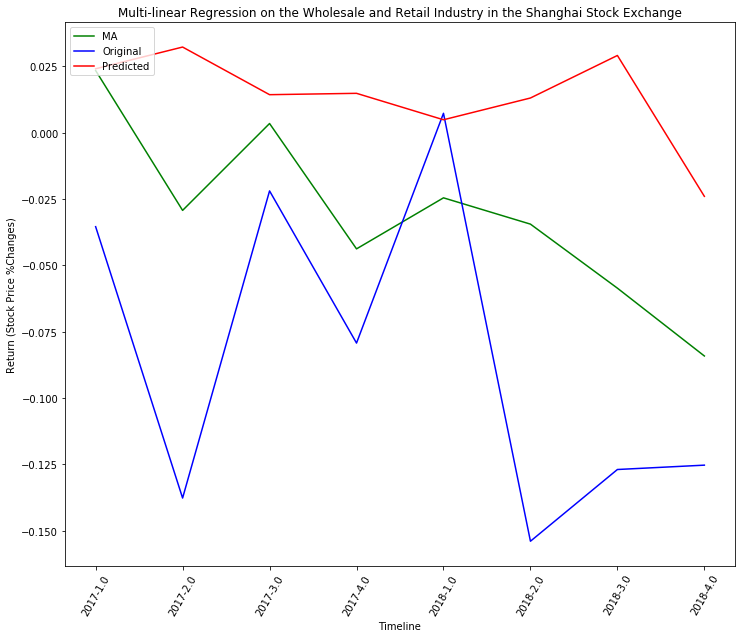

In [12]:
#Run regression on the whole industry

df_train = df_industry.iloc[8:36,:]
x_train = df_train[['ROE','ROA','Current Ratio']]
y_train = df_train[['Stock Return']]

df_test = df_industry.iloc[36:,:]
x_test = df_test[['ROE','ROA','Current Ratio']]
y_test = df_test[['Stock Return']]

model = LinearRegression()
model.fit(x_train,y_train)
intercept = round(model.intercept_[0],4)
coefs = model.coef_
roe = round(coefs[0][0],4)
roa = round(coefs[0][1],4)
cr = round(coefs[0][2],4)

print('\nIntercept: %f \nCoefficient: %s'%(intercept,coefs))

print('\nBest fitted line for the industry：Y = %f + %f*ROE + %f*ROA + %f*CR' % (intercept,roe,roa,cr))
                 
y_pred = model.predict(x_test)

df_test['Predicted Return'] = y_pred

#plot the predicted prices and original prices from the test sets
plt.plot(df_test.index,df_test['MA Return'],'g-',label='MA')
plt.plot(df_test.index,df_test['Stock Return'],'b-',label='Original')
plt.plot(df_test.index,df_test['Predicted Return'],'r-',label='Predicted')

plt.title('Multi-linear Regression on the Wholesale and Retail Industry in the Shanghai Stock Exchange')
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.xlabel('Timeline')
plt.ylabel('Return (Stock Price %Changes)')
plt.show();

## Monte Carlo Simulation and Asset Allocation

In [13]:
# comparsion = dict()
# for s in stocks:
#     intercept,roe,roa,cr,y_pred,df_train,singals,avg_return = run_reg(s)
    
#     comparsion[s] = [singals,avg_return]
    
# compare = Counter(comparsion)

In [14]:
# #Select top three companies of which the predicted prices beats the orignal prices 
# top_3 = compare.most_common(3)
# top_returns = dict(zip([i[0] for i in top_3],[i[1][1] for i in top_3]))
# top_returns

In [15]:
#Construct the average historical price returns of each stock
#！！这个是历史return，还需要写一个predicted return以便后面计算投资组合收益
stock_returns = pd.DataFrame(index=df_industry.iloc[8:36,:].index)

for s in stocks:
    stock_returns[s] = list(df_merged.loc[s].iloc[8:36,:]['Stock Return'])
    


In [16]:
#Contruct an investment portfolio and assign random weights to 175 companies
# Set the number of assets to assign weights
num_assets = 175

# Set the number of runs of random portfolio weights
num_portfolios = 1000

# Set up array to hold results
results = np.zeros((num_assets,num_portfolios))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#Generate the random weights for each company 
weights = np.random.random(num_assets)
weights /= np.sum(weights)
# weights,sum(weights)

In [18]:
# Test the calculation of portfolio returns with random weights 
stock_returns.mean()*4*weights

*ST人乐    0.000186
*ST华信    0.001444
*ST大控    0.000166
*ST天圣    0.000000
*ST赫美    0.002022
ST成城     0.004734
一心堂      0.000746
一致B      0.001154
三只松鼠     0.000000
三夫户外     0.002811
           ...   
重庆百货    -0.000079
重药控股     0.000330
银座股份    -0.000724
飞亚达A     0.000312
飞亚达B     0.000006
首商股份     0.000014
马应龙      0.000110
高鸿股份     0.001217
鹭燕医药     0.002364
龙宇燃油     0.001477
Length: 175, dtype: float64

In [19]:
# Expected Portfolio Return
np.sum(weights*stock_returns.mean()*4)

0.1805164994651924

In [20]:
# Expected Portfolio Volatility
np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*4, weights)))

0.31399230306133025

In [21]:
import copy

pfolio_returns = []
pfolio_volatilities = []

min = float("inf")
min_weights = []

for x in range (num_portfolios):
    
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns = np.sum(weights * stock_returns.mean()) * 4
    pfolio_volatilities = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov() * 4, weights)))
    
    if pfolio_volatilities < min:
        min_weights = copy.deepcopy(weights)
        
    # Store results in results array
    results[0,x] = pfolio_returns
    results[1,x] = pfolio_volatilities
    # Store Sharpe Ratio(return/volatility) - risk free rate 
    results[2,x] = (results[0,x]- 0.025)/results[1,x]
    

# convert results array to Pandas DataFrame
transformed_results = results.T[:,:3]
results_frame = pd.DataFrame(transformed_results,columns =['Return','Volatility','Sharpe'])

# #locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
# #locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]


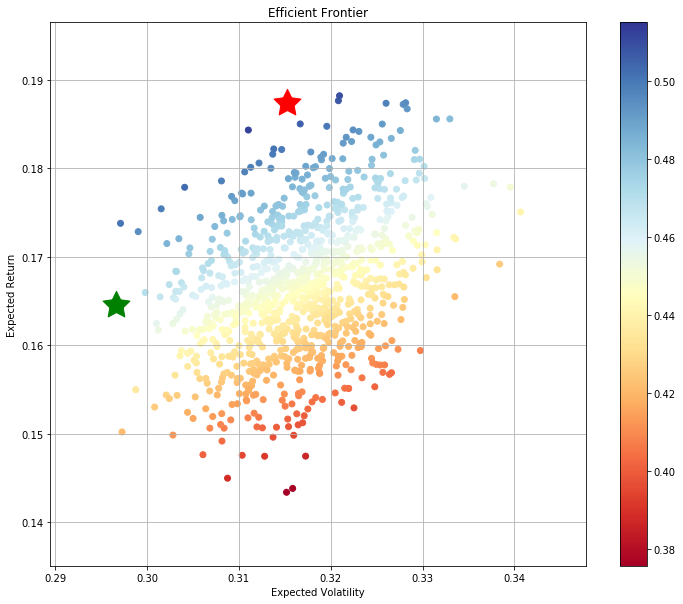

In [22]:
# # Visualize the effecient froniter from 1000 times simulations 
plt.scatter(results_frame.Volatility,results_frame.Return,c=results_frame.Sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=800)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=800)

plt.show()

## Analyze Expected Return and Calculate Beta-Hedge Return 

In [23]:
#Use the regression to get the predicted return for each stocks

def run_expected_return(stockname):
    df_train, x_train, y_train = pre_train(stockname)
    model = LinearRegression()
    model.fit(x_train, y_train)    
    y_pred = model.predict(x_train)
    return y_pred

# y_predicted_return = run_expected_return('重庆百货')

predicted_returns=pd.DataFrame(index=df_train.index)

for s in stocks:
    predicted_returns[s]=run_expected_return(s)

predicted_returns.head()

,*ST人乐,*ST华信,*ST大控,*ST天圣,*ST赫美,ST成城,一心堂,一致B,三只松鼠,三夫户外,...,重庆百货,重药控股,银座股份,飞亚达A,飞亚达B,首商股份,马应龙,高鸿股份,鹭燕医药,龙宇燃油
Timeline,,,,,,,,,,,,,,,,,,,,,
2010-1.0,1.297688,0.096957,0.038938,0.0,2.229752,0.141865,0.133633,0.105239,0.0,0.126369,...,-0.033487,0.018253,-0.111723,-0.020271,-0.022547,0.006917,0.024266,0.003531,0.133668,-0.018404
2010-2.0,0.113477,0.085020,-0.084694,0.0,-0.145509,-0.360303,0.070647,0.001122,0.0,0.126369,...,0.013603,-0.422316,0.002389,-0.019853,-0.041268,0.011155,-0.032867,0.038067,0.133668,0.028377
2010-3.0,-0.132670,0.045916,0.030578,0.0,0.137617,0.202941,0.070647,0.029030,0.0,0.126369,...,-0.022964,0.165463,-0.043849,0.028700,0.033272,-0.001393,0.008376,0.054254,0.133668,0.028377
2010-4.0,0.001843,-0.164799,0.053334,0.0,-0.122437,-0.206248,0.035020,0.063422,0.0,0.126369,...,-0.057048,-0.034153,0.028764,0.320730,0.319086,0.028149,-0.010650,0.072777,0.133668,0.211396
2011-1.0,-0.031505,0.092999,0.003465,0.0,0.157057,0.465561,0.107689,0.088472,0.0,0.126369,...,-0.059291,0.065348,-0.052984,0.014286,-0.001676,0.017095,-0.016731,0.028585,0.133668,-0.016287


In [24]:
#Extrac daily Shanghai Stock Exchange Index data
cons = ts.get_apis()
df_sse = ts.bar('000001',conn=cons,asset='INDEX',start_date='2007-12-28',end_date='2019-08-05')
df_sse = df_sse.sort_values('datetime')

In [152]:
# input data of 175 stock closing prices and compute p&l: St-St-1
current_dir = os.path.dirname(os.path.abspath('__file__'))
file = 'closingPrice_175.xlsx'
path = os.path.join(current_dir, file)
print('This is your file path:\n'+ path)

#Read stock data to a dataframe
sec_data = pd.read_excel(path,index_col='Timeline')

#Substitute the missing values with the average of that company's stock prices
sec_data = sec_data.apply(lambda x: x.fillna(x.mean()),axis=0)

#Join the 上证指数 closing price column with the 175 stock dataframe
sec_data = sec_data.join(df_sse['close'])
sec_data.rename(columns={'close':'上证指数'}, inplace=True)

# pct_change() obtains simple returns from a given dataset
log_returns = np.log(1 + sec_data.pct_change())
#Restrict the timeframe to match the insample period
log_returns = log_returns.loc['2010-1-1':'2016-12-31']

#Construct the stock returns without 上证指数 
sec_returns = log_returns.iloc[:,:-1]


This is your file path:
C:\Users\47523\Downloads\bb\closingPrice_175.xlsx


In [153]:
# Transform the list of tuples in the varaible records into a pandas dataframe 
df = pd.DataFrame()

# Set column names 
df['Stock Name'] = stocks

# Calculate the annual return based on the mean and 250 trading days each year
# Add to the master data frame
df['Realized_Return'] = list(sec_returns.mean()*250)

# Calculate the volatility which is the standard deviation 
# Add to the master data frame
df['Volatility'] = list(sec_returns.std()*250**0.5)

# Compute the variance and compare the covariance with SP500
cov = log_returns.cov()*250

# Compute the corrleation and compare with SP500
corr = log_returns.corr()

In [154]:
# Calculate stock betas basd on the formula above

betas=[]
for num in range(len(df.index)):
    cov_with_market = cov.iloc[len(df.index),num]
    market_var = log_returns['上证指数'].var()*250
    beta = cov_with_market / market_var
    betas.append(beta)
    
df['Beta']=betas

# Set the Ticker as the index
df = df.set_index('Stock Name')

In [155]:
# Calculate the expected return

# I assume that the risk-free rate is 3.4% from government-issued T-bills
rf = 0.034

# Calculate the Market Preimum by subtracing the risk-free rate from the market return 
rp = log_returns['上证指数'].mean()*250 - rf

# Calculate the Exptected Return by applying the CAPM forumla above
df['Expected_Return'] = df['Beta']*(rp-rf) +rf

# Calculate the Beta Hedged Return by subracting the systemtic risk adjusted return
df['Beta Hedged Return']= df['Realized_Return'] - df['Beta']*(rp-rf)

df.head()

,Realized_Return,Volatility,Beta,Expected_Return,Beta Hedged Return
Stock Name,,,,,
*ST人乐,0.064663,0.536493,1.185041,-0.056062,0.154725
*ST华信,0.233706,0.563457,0.993779,-0.041527,0.309232
*ST大控,0.006923,0.481675,1.225512,-0.059138,0.100061
*ST天圣,0.129778,0.403412,0.762007,-0.023912,0.187690
*ST赫美,0.080706,0.522096,1.290035,-0.064042,0.178747


## Construct the Beta Hedged Portfolio

In [156]:
# Calculate the hedged returns of each stock
hedged_returns = pd.DataFrame(index=log_returns.index,columns=stocks)

for s in stocks:
    hedged_returns[s] = log_returns[s] - df.loc[s]['Beta']*(log_returns['上证指数']-rf)

#Calculate the hedged returns of our minimum variance portfolio
hedged_returns = hedged_returns*min_weights
hedged_returns['My Portfolio'] = hedged_returns[stocks].sum(axis=1)
hedged_returns.head()

,*ST人乐,*ST华信,*ST大控,*ST天圣,*ST赫美,ST成城,一心堂,一致B,三只松鼠,三夫户外,...,重药控股,银座股份,飞亚达A,飞亚达B,首商股份,马应龙,高鸿股份,鹭燕医药,龙宇燃油,My Portfolio
Timeline,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.000408,0.000529,0.000606,0.000258,0.000044,0.000055,0.000218,0.000335,0.000165,0.000598,...,0.000009,0.000010,-0.000064,-0.000120,0.000423,0.000285,0.000016,0.000313,0.000245,0.041972
2010-01-05,0.000205,0.000275,0.000220,0.000130,0.000022,0.000004,0.000110,0.000299,0.000083,0.000300,...,0.000028,0.000244,0.000043,0.000103,0.000222,0.000142,0.000008,0.000157,0.000123,0.025519
2010-01-06,0.000392,0.000308,0.000520,0.000248,0.000042,0.000112,0.000210,0.000788,0.000159,0.000575,...,0.000036,-0.000145,0.000710,0.000153,0.000555,0.000033,0.000010,0.000301,0.000236,0.038316
2010-01-07,0.000489,0.000186,0.000336,0.000309,0.000053,-0.000024,0.000261,0.000340,0.000198,0.000717,...,-0.000015,-0.000436,-0.000270,-0.000291,0.000631,0.000135,0.000002,0.000375,0.000294,0.029542
2010-01-08,0.000304,0.000306,0.000543,0.000192,0.000033,0.000042,0.000163,0.000306,0.000123,0.000446,...,0.000024,0.000002,0.000245,-0.000035,0.000219,0.000249,0.000005,0.000233,0.000183,0.040630


In [189]:
#Analyze the My Portfolio annualized returns and volatility
hedged_returns['My Portfolio'].describe()*250

count    425000.000000
mean          7.896873
std           2.160030
min          -8.264651
25%           7.051137
50%           8.035931
75%           9.026504
max          19.879075
Name: My Portfolio, dtype: float64

## Profit & Loss Analysis

In [158]:
#Set the initial investment to be ￥10,000

initial = 1000

pnl = pd.DataFrame(index=log_returns.index)

pnl['Cum Return'] = hedged_returns['My Portfolio'].cumsum()

pnl['Return Factor'] = (hedged_returns['My Portfolio'].iloc[1:]+1).cumprod()
pnl['Return Factor'].iloc[0] = 1

pnl['PnL'] = initial*pnl['Return Factor']

print('Investment Prospect')
print('\nIf you allocate ￥%d investment into all 175 wholesale stocks in Shanghai Stock Exchange on 1/4/2010 and wait till 12/30/2016,\
    \n\nyou will be receiving ￥%d.'%(initial,pnl['PnL'][-1]))

pnl.style.format({
    'Cum Return':'{:,.2f}'.format,
    'Return Factor':'{:,.2f}'.format,
    'PnL':'${:,.2f}'.format
})



Investment Prospect

If you allocate ￥1000 investment into all 175 wholesale stocks in Shanghai Stock Exchange on 1/4/2010 and wait till 12/30/2016,    

you will be receiving ￥82492380028828070036111360.


,Cum Return,Return Factor,PnL
Timeline,,,
2010-01-04 00:00:00,0.04,1.00,"$1,000.00"
2010-01-05 00:00:00,0.07,1.03,"$1,025.52"
2010-01-06 00:00:00,0.11,1.06,"$1,064.81"
2010-01-07 00:00:00,0.14,1.10,"$1,096.27"
2010-01-08 00:00:00,0.18,1.14,"$1,140.81"
2010-01-11 00:00:00,0.20,1.17,"$1,173.82"
2010-01-12 00:00:00,0.23,1.21,"$1,206.37"
2010-01-13 00:00:00,0.29,1.28,"$1,280.20"
2010-01-14 00:00:00,0.33,1.33,"$1,332.06"


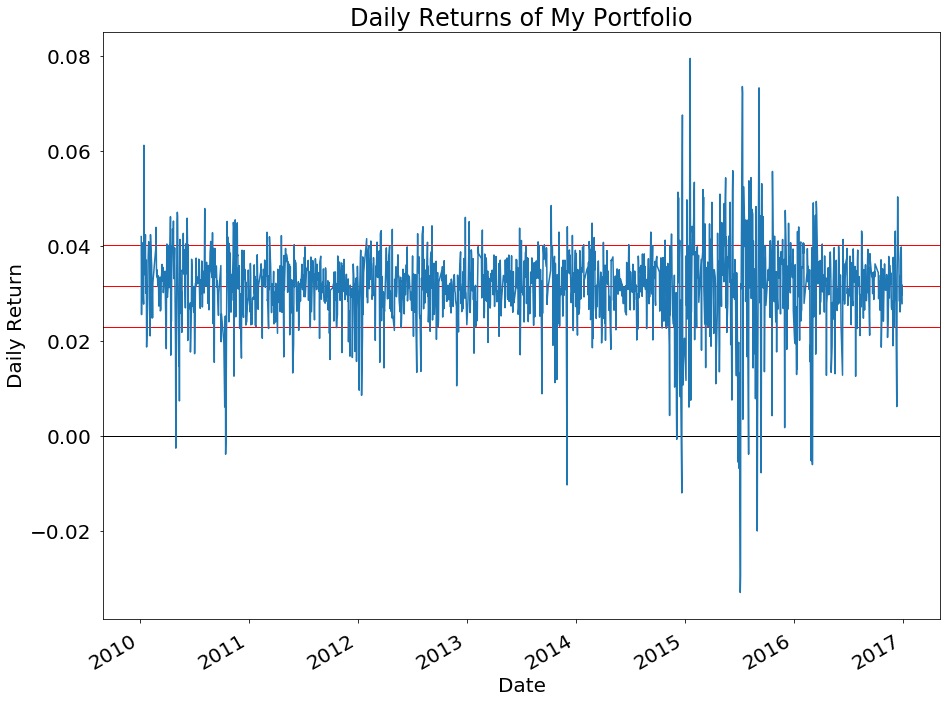

In [177]:
graph = hedged_returns['My Portfolio'].plot();

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns of My Portfolio')

graph.axhline(y=hedged_returns['My Portfolio'].mean(),c="r",linewidth=1,zorder=0);
#plot the upper and lower boundaries of one standard deviation from the mean
graph.axhline(y=hedged_returns['My Portfolio'].mean()+hedged_returns['My Portfolio'].std(),c="r",linewidth=1,zorder=0);
graph.axhline(y=hedged_returns['My Portfolio'].mean()-hedged_returns['My Portfolio'].std(),c="r",linewidth=1,zorder=0);
#plot the zero line as the reference
graph.axhline(y=0,c="black",linewidth=1,zorder=0);

plt.show()

In [179]:
##compute cumulative distribution
####################
def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        norm = norm + 1.0
        x.append(n)
        cx.append(norm/float(len(sorted_data)+1.0))
    return x, cx
#####################

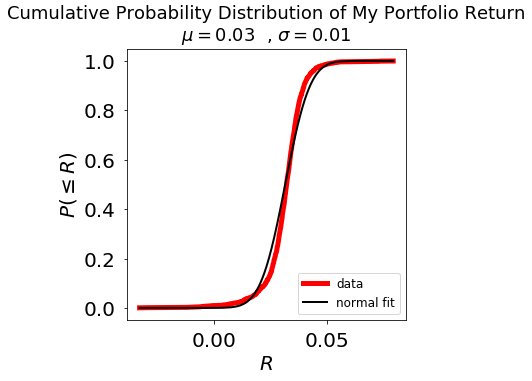

In [187]:
##visualize time series

plt.figure(figsize=(5,5))
plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.xlabel('$R$')
plt.ylabel('$P(\leq R)$')

x,cx = cumulative_from_data(hedged_returns['My Portfolio'])
plt.plot(x, cx, color = 'red', lw = 5, label = 'data')


av = np.mean(hedged_returns['My Portfolio'])
sigma = np.std(hedged_returns['My Portfolio'])

plt.plot(x, stats.norm.cdf(x, loc=av, scale=sigma),'k-', lw=2, alpha=1.0, label='normal fit')
plt.legend(loc=4, fontsize=12)

title = 'Cumulative Probability Distribution of My Portfolio Return\n$ \mu = %.2f' %av + '$  , $\sigma = %.2f' % sigma +'$'
plt.title(title, fontsize=18)


plt.show()

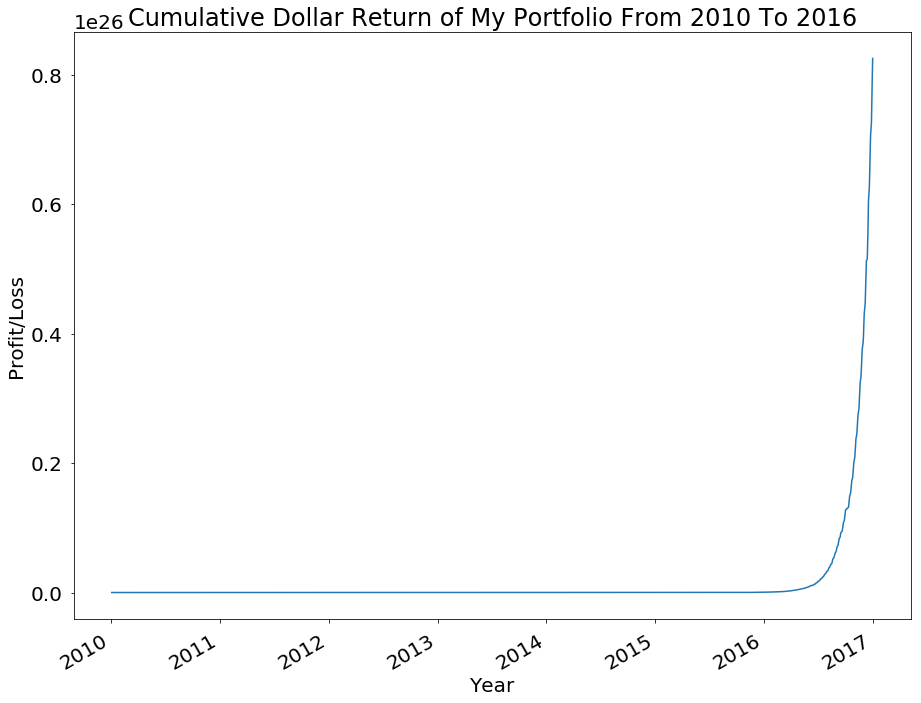

In [191]:
pnl_graph = pnl['PnL'].plot()
# preturn_graph = pnl_graph.twinx()
# preturn_graph.spines['right'].set_position(('axes',1.0))
# Q_pnl = pnl.copy()
# Q_pnl.set_index(pd.PeriodIndex(Q_pnl.index,freq='M'),inplace=True)

plt.title('Cumulative Dollar Return of My Portfolio From 2010 To 2016')
plt.xlabel('Year')
pnl_graph.set_ylabel('Profit/Loss')
# preturn_graph.set_ylabel('%Cumulative Return')

plt.show();
